In [2]:
import math
x = 3*math.pi/2
def f(n):
    return ((-1)**n) * (x**(2*n+1)) / math.factorial(2*n + 1)
print(sum(map(f, range(15))))

-0.9999999999999121


In [7]:
output=[]
for i in range(15):
    output.append(2*i)
print(output)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]


In [8]:
def map(func, iterable):
    output = [] # Empty list for output
    for i in iterable:
        output.append(func(i))
    return output

In [9]:
sum(map(f, range(15)))

-0.9999999999999121

In [4]:
range(15)

range(0, 15)

In [3]:
n = 0
def f(x):
    return (x**3) - (6*x**2) + (4*x) + 12
def compute_root(f, x0, x1, xmid, tol, max_it):
    x0, x1, tol, max_it = 3, 6, 1e-8, 1000
    while abs(f(xmid)) >= tol or i > max_it:
        print(n) # DEBUG
        n = n+1
        xmid = (x0 + x1)/2
        if f(x0)*f(xmid) < 0:
              x1 = xmid
        else:
              x0 = xmid
    return xmid
    return n
    return f(xmid)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import quandl
except ImportError:
    import sys
    if 'conda' in sys.version:  # Install using conda if we're using Anaconda Python
        !conda install -yc conda-forge quandl
    else:  # Install using pip on others systems
        try:
            !{sys.executable} -m pip -q install quandl  # Try to install globally
            import quandl
        except ImportError:
            !{sys.executable} -m pip -q install --user quandl  # Install in user space

try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")
        
####################

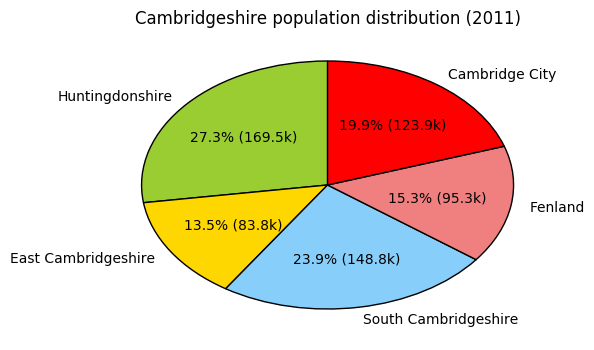

In [42]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.3
from ipywidgets import interact, HBox, Label, IntSlider

district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)
start_year = 2011
starting_pops = dict(zip(district, population))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

slider_dict = {x: ipywidgets.FloatSlider(min=0.0, max=10.0, step=0.1,
                                         value=0.0, continuous_update=False)
               for x in district}

# Taken and adapted from http://stackoverflow.com/a/6170354
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:1.1f}k)'.format(p=pct,v=val/1000)
    return my_autopct


@interact(current_year = IntSlider(min=2011, max=2021, step=1, 
                                   value=2011, description='Current year'),
          **slider_dict)
def dopie(current_year, **kwargs):
    growthrates = {i: kwargs[i]/100 for i in kwargs}
    yeardifference = current_year - start_year
    
    current_pops = {k: starting_pops[k] * (1+growthrates[k])**yeardifference for k in starting_pops}
    # Produce pie chart. The slices will be ordered and plotted counter-clockwise.
    values = list(current_pops.values())
    keys = current_pops.keys()
    plt.pie(values, labels=keys, colors=colors,
            autopct=make_autopct(values), startangle=90)

    # Add title
    plt.title("Cambridgeshire population distribution ({})".format(current_year))

In [25]:
# List at https://www.math.utah.edu/~pa/math/primelist.html
# used to confirm first 1k primes generated with this program
# (matching md5sums)

primes = [(1, 2), ]
i = 1
x = 2
lim = 1000
while len(primes) < lim:
    i += 2
    for p in primes:
        if p[1] > i**0.5: # no prime divisors, i is prime
            primes.append((x, i))
            x+=1
            break
        if i % p[1] == 0: break

print(' '.join([str(_[1]) for _ in primes]))
print()

print("nth\tprime")
for _ in primes: print(*_, sep='\t')

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953 967 971 977 983 991 997 1009 1013 1019 1021 1031 1033 1039 1049 1051 1061 1063 1069 1087 1091 1093 1097 1103 1109 1117 1123 1129 1151 1153 1163 1171 1181 1187 1193 1201 1213 1217 1223 1229 1231 1237 1249 1259 1277 1279 1283 1289 1291 1297 1301 1303 1307 1319 1321 1327 1361 1367 1373 1381 1399 1409 1423 1427 1429 1433 1439 1447 1451 1453 1459 1471 1481 1483 1487 1489 1493 1499 15